In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with open('/home/chilltoast/Desktop/Datasets_for_ML/credit_risk_dataset.csv') as txt:
    data = pd.read_csv(txt)

In [3]:
with open('/home/chilltoast/Desktop/Datasets_for_ML/simulated_credit_risk_dataset.csv') as txt:
    data1 = pd.read_csv(txt)

In [4]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [6]:
data.isnull().count()

person_age                    32581
person_income                 32581
person_home_ownership         32581
person_emp_length             32581
loan_intent                   32581
loan_grade                    32581
loan_amnt                     32581
loan_int_rate                 32581
loan_status                   32581
loan_percent_income           32581
cb_person_default_on_file     32581
cb_person_cred_hist_length    32581
dtype: int64

In [7]:
#loan status - target variable

In [8]:
loan_intents = data['loan_intent'].drop_duplicates().tolist()

In [9]:
enumerate (set(loan_intents))

In [10]:
keys=[]
intents=[]
for key, intent in enumerate(set(loan_intents)):
    keys.append(key)
    intents.append(intent)

dict_loanIntent = dict(zip(intents,keys))
print (dict_loanIntent)

{'MEDICAL': 0, 'PERSONAL': 1, 'VENTURE': 2, 'HOMEIMPROVEMENT': 3, 'DEBTCONSOLIDATION': 4, 'EDUCATION': 5}


In [11]:
new_data = data

In [12]:
new_data['loan_intent'] = new_data['loan_intent'].map(dict_loanIntent)

In [13]:
new_data.iloc[8146]

person_age                       24
person_income                 56000
person_home_ownership           OWN
person_emp_length               8.0
loan_intent                       2
loan_grade                        A
loan_amnt                      2000
loan_int_rate                  6.99
loan_status                       0
loan_percent_income            0.04
cb_person_default_on_file         N
cb_person_cred_hist_length        3
Name: 8146, dtype: object

In [14]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,1,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,5,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,0,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,0,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,0,C,35000,14.27,1,0.55,Y,4


In [15]:
data['loan_intent'].head()

0    1
1    5
2    0
3    0
4    0
Name: loan_intent, dtype: int64

In [16]:
from sklearn.ensemble import IsolationForest

# Fit the model
iso_forest = IsolationForest(contamination=0.1)
data['outlier'] = iso_forest.fit_predict(data[['person_income']])

# Identify outliers
outliers_if = data[data['outlier'] == -1]
print(outliers_if)


       person_age  person_income person_home_ownership  person_emp_length  \
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
5              21           9900                   OWN                2.0   
9              21          10000                   OWN                6.0   
11             21          10000                   OWN                2.0   
...           ...            ...                   ...                ...   
32547          53           4888                   OWN                0.0   
32551          58         780000              MORTGAGE                7.0   
32561          54         129000              MORTGAGE                6.0   
32562          61         160000              MORTGAGE               30.0   
32579          56         150000              MORTGAGE                5.0   

       loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
1  

In [17]:
# Calculate IQR
Q1 = data['person_income'].quantile(0.25)
Q3 = data['person_income'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['person_income'] < lower_bound) | (data['person_income'] > upper_bound)]
#print (lower_bound)
#print (upper_bound)
#print(outliers)


In [18]:
len(outliers)

1484

In [19]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,outlier
0,22,59000,RENT,123.0,1,D,35000,16.02,1,0.59,Y,3,1
1,21,9600,OWN,5.0,5,B,1000,11.14,0,0.10,N,2,-1
2,25,9600,MORTGAGE,1.0,0,C,5500,12.87,1,0.57,N,3,-1
3,23,65500,RENT,4.0,0,C,35000,15.23,1,0.53,N,2,1
4,24,54400,RENT,8.0,0,C,35000,14.27,1,0.55,Y,4,1


In [20]:
def monthly_payments():
    for loan_amnt,loan_int_rate in zip(data['loan_amnt'],data['loan_int_rate']):
        mnt_pymnt = (loan_amnt*loan_int_rate/1-(1+loan_int_rate)**(-36))
    return mnt_pymnt
    
    #data['Monthly_payment_36Months'] = ((loan_amnt * loan_int_rate) / (1 - (1+loan_int_rate)**-36))
    #data['Monthly_payment_60Months'] = ((loan_amnt * loan_int_rate) / (1 - (1+loan_int_rate)**-60))

#print (data['Monthly_payment_36Months'])
monthly_payments()

64685.25

In [21]:
import pandas as pd

# Function to calculate the payment
def calculate_payment(row):
    loan_amnt = row['loan_amnt']
    loan_int_rate = row['loan_int_rate']
    
    # Monthly interest rate
    monthly_rate = loan_int_rate / 12
    
    # Calculate the payment based on your formula
    payment = loan_amnt * monthly_rate / (1 - (1 + monthly_rate) ** -36)
    
    return payment

# Apply the function to each row and create a new column
data['monthly_payment_36Months'] = data.apply(calculate_payment, axis=1)

# Display the updated DataFrame
print(data)


       person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

       loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0  

In [22]:
order = ['person_age','person_income','person_home_ownership','person_emp_length','loan_intent','loan_grade','loan_amnt','loan_int_rate','monthly_payment_36Months','loan_status','loan_percent_income','cb_person_default_on_file','cb_person_cred_hist_length','outlier']
data = data.reindex(columns=order)

In [23]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,monthly_payment_36Months,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,outlier
0,22,59000,RENT,123.0,1,D,35000,16.02,46725.000000,1,0.59,Y,3,1
1,21,9600,OWN,5.0,5,B,1000,11.14,928.333333,0,0.10,N,2,-1
2,25,9600,MORTGAGE,1.0,0,C,5500,12.87,5898.750000,1,0.57,N,3,-1
3,23,65500,RENT,4.0,0,C,35000,15.23,44420.833333,1,0.53,N,2,1
4,24,54400,RENT,8.0,0,C,35000,14.27,41620.833333,1,0.55,Y,4,1


In [24]:
home_ownership = {'OWN':0,'RENT':1,'OTHER':2,'MORTGAGE':3}

data['person_home_ownership'] = data['person_home_ownership'].map(home_ownership)

In [25]:
loan_grade = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6}
data['loan_grade'] = data['loan_grade'].map(loan_grade)

In [26]:
data['cb_person_default_on_file'] = data['cb_person_default_on_file'].map({'Y':1,'N':0})

In [33]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,monthly_payment_36Months,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,outlier
0,22,59000,1,123.0,1,3,35000,16.02,46725.000000,1,0.59,1,3,1
1,21,9600,0,5.0,5,1,1000,11.14,928.333333,0,0.10,0,2,-1
2,25,9600,3,1.0,0,2,5500,12.87,5898.750000,1,0.57,0,3,-1
3,23,65500,1,4.0,0,2,35000,15.23,44420.833333,1,0.53,0,2,1
4,24,54400,1,8.0,0,2,35000,14.27,41620.833333,1,0.55,1,4,1


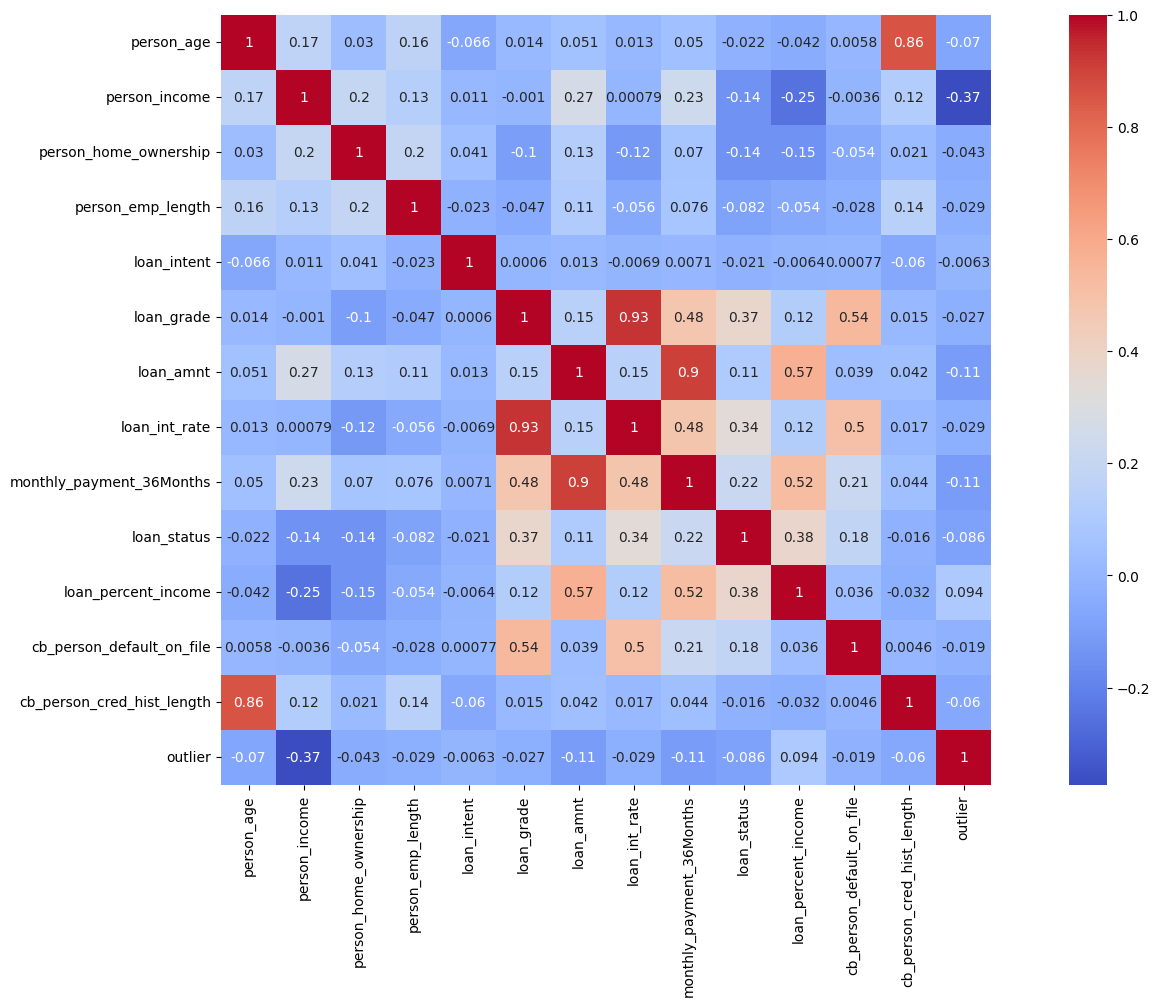

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.show()

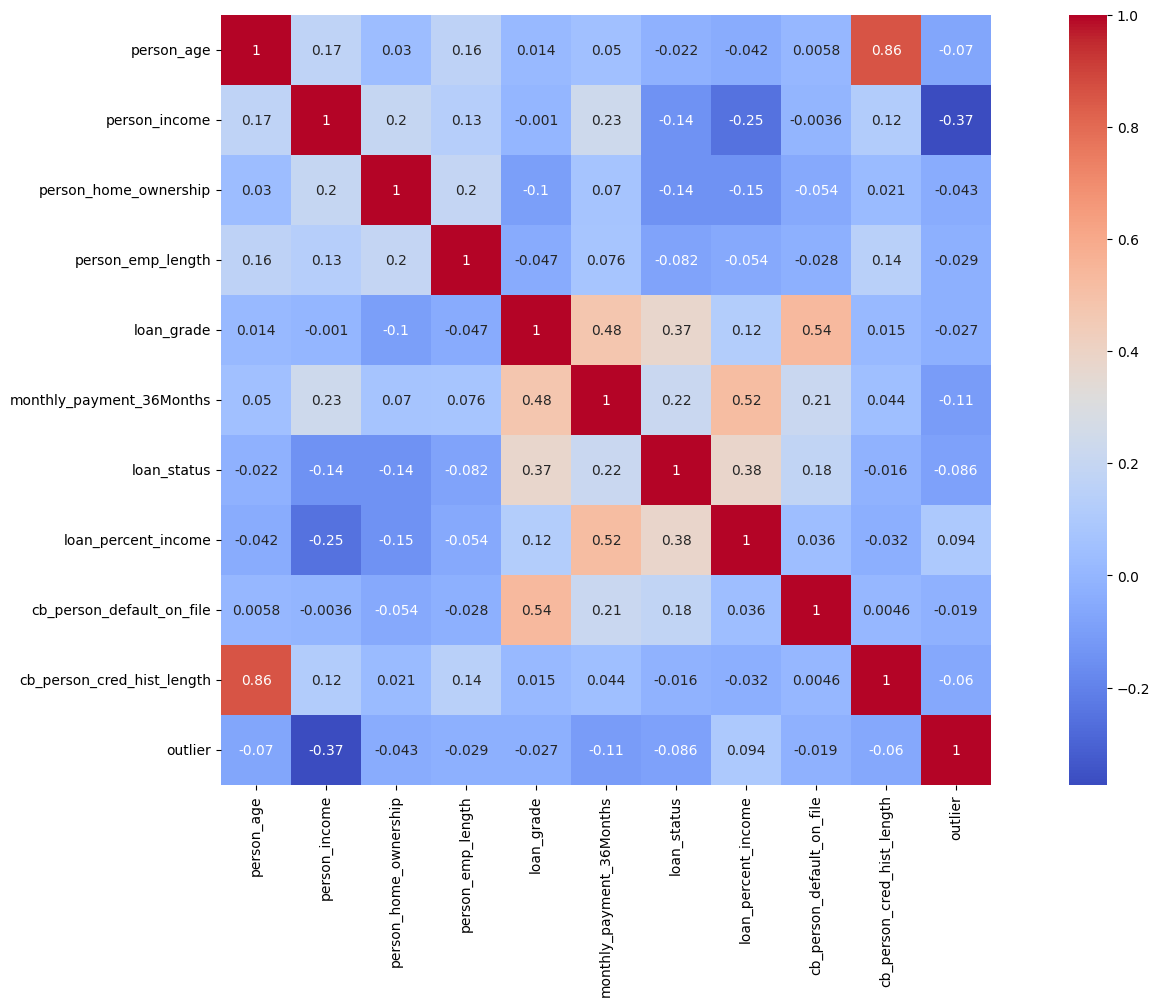

In [75]:
df = data.drop(columns=['loan_int_rate', 'loan_amnt','loan_intent'])
corr = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
import xgboost as xgb

In [43]:
x = data.drop(columns=['cb_person_default_on_file'])
y = data['cb_person_default_on_file']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [50]:
# base model
# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # For binary classification
    eval_metric='logloss',        # Evaluation metric
    random_state=42
)


In [51]:
# Train the XGBoost model
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [52]:
# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Calculate and print accuracy of base model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.8272


In [61]:
# optimised model - drop loan_int_rate and keep loan_grade
x = data.drop(columns=['cb_person_default_on_file', 'loan_int_rate'])
y = data['cb_person_default_on_file']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # For binary classification
    eval_metric='logloss',        # Evaluation metric
    random_state=42
)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# Calculate and print accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8243


In [91]:
# optimised model - drop loan_int_rate and keep loan_grade
# drop loan_amnt, loan_intent
x = data.drop(columns=['cb_person_default_on_file', 'loan_int_rate', 'loan_amnt','loan_intent'])
y = data['cb_person_default_on_file']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # For binary classification
    eval_metric='logloss',        # Evaluation metric
    random_state=42
)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# Calculate and print accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8245


In [103]:
# optimised model - drop loan_int_rate for loan_grade
# drop loan_amnt, loan_intent, person_age
x = data.drop(columns=['cb_person_default_on_file', 'person_age', 'loan_int_rate', 'loan_amnt','loan_intent'])
y = data['cb_person_default_on_file']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # For binary classification
    eval_metric='logloss',        # Evaluation metric
    random_state=42
)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# Calculate and print accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8311


AUC-ROC Score 4 point decimal: 0.9023
AUC-ROC Score 0.9022855314405034


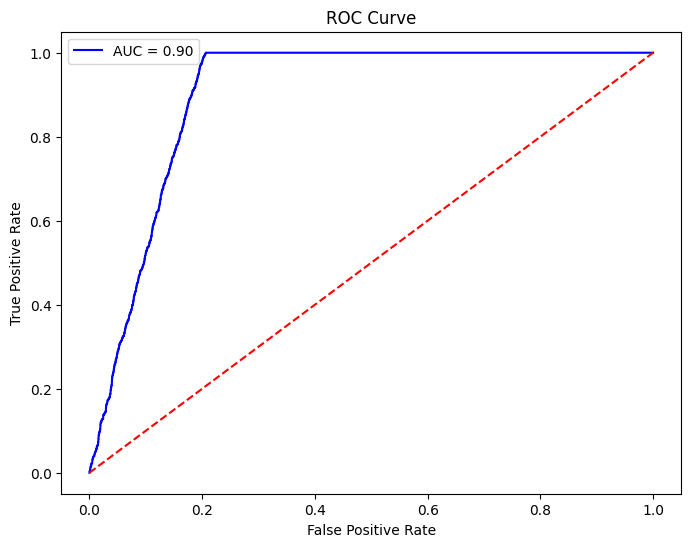

In [104]:
# aoc-roc test
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming `X_test` is your test set
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (1)
# Assuming `y_test` is the true labels for the test set
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC Score 4 point decimal: {auc_score:.4f}")
print("AUC-ROC Score", auc_score)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [109]:
from sklearn.model_selection import cross_val_score
import numpy as np
scores = cross_val_score(xgb_model, x, y, cv=5, scoring='roc_auc')  # scoring='roc_auc' for AUC-ROC score
print("AUC-ROC scores for each fold:", scores)
print("Mean AUC-ROC score:", np.mean(scores))
print("Standard deviation of AUC-ROC scores:", np.std(scores))


AUC-ROC scores for each fold: [0.89546505 0.90660952 0.88891792 0.90121432 0.89383944]
Mean AUC-ROC score: 0.897209248818392
Standard deviation of AUC-ROC scores: 0.006124534757522225


In [111]:
import shap

# Initialize the SHAP explainer for your XGBoost model
explainer = shap.TreeExplainer(xgb_model)
# Calculate SHAP values for your dataset
shap_values = explainer.shap_values(x)
shap_values

array([[ 0.28335464,  0.13136399,  0.7708506 , ...,  1.0037049 ,
         0.08885973, -0.00667598],
       [-0.74559   , -0.06689735, -0.2109852 , ..., -0.10752274,
        -0.20654391,  0.14819922],
       [-0.47972795, -0.21628907, -0.6589351 , ..., -0.10114817,
        -0.54470366,  0.1817121 ],
       ...,
       [ 0.6183612 ,  0.1280771 ,  0.13150896, ...,  0.661098  ,
        -0.34451   , -0.00141519],
       [-0.27418205,  0.00446229,  0.00215094, ..., -0.00636668,
        -0.5317249 ,  0.01084099],
       [-0.25726035, -0.02550839, -0.18967423, ..., -0.128585  ,
        -0.4689528 ,  0.00271013]], dtype=float32)

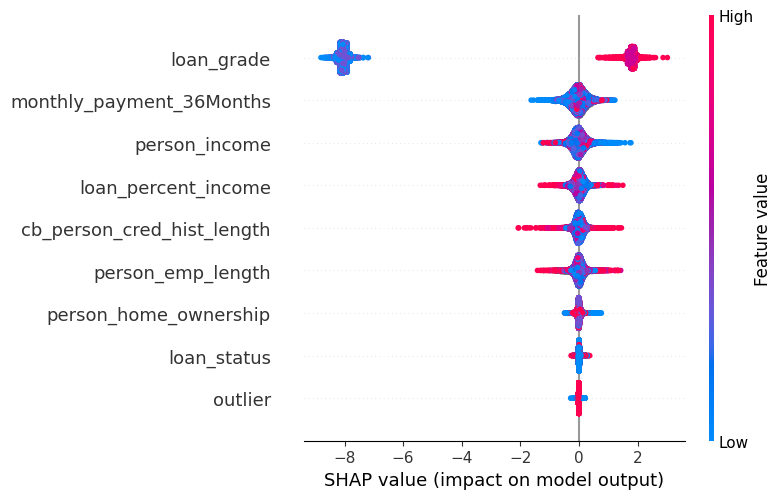

In [112]:
shap.summary_plot(shap_values, x)


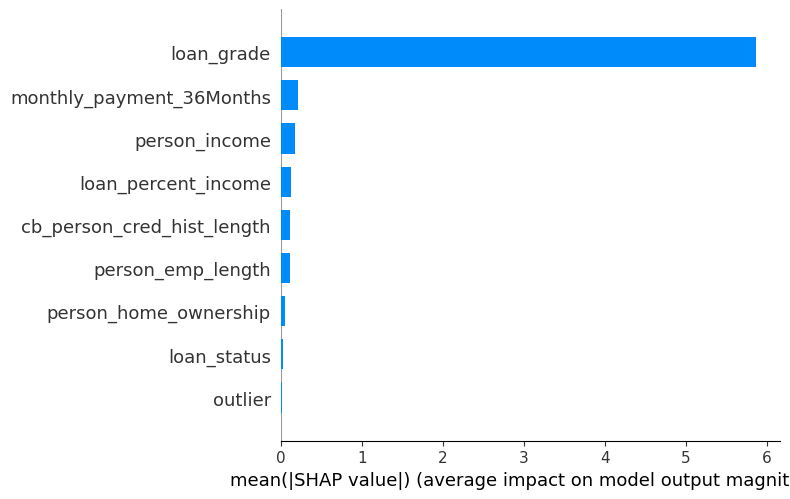

In [114]:
shap.summary_plot(shap_values, x, plot_type="bar")

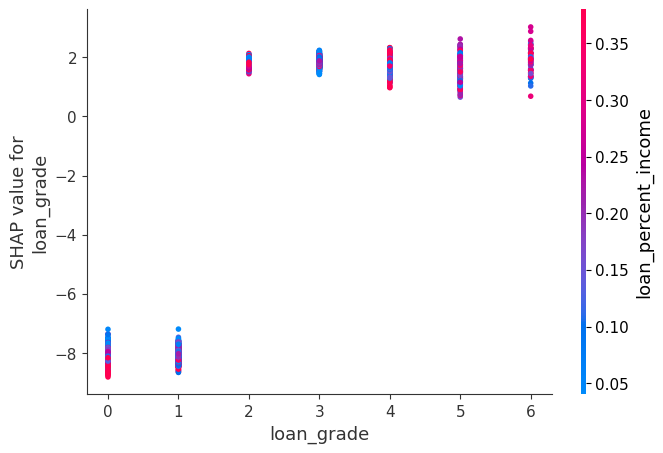

In [118]:
shap.dependence_plot("loan_grade", shap_values, x)
